# Spectrograms of real and complex WGN

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
import zerosSpectrogram

This notebook presents the zeros of spectrograms of real-valued and complex-valued white Gaussian noise.
The statistical distribution of the zeros of the spectrogram of real white Gaussian noise is identical to the distribution of the zeros of symmetric planar Gaussian analytic functions.
For complex white Gaussian noise, the distribution of the zeros of the spectrogram is the same as the distribution of zeros of planar Gaussian analytic functions.

## Zeros of the spectrogram of real white Gaussian noise

In [28]:
base = 256 # define the length of the simulation
np.random.seed(0)
pos, plotData = zerosSpectrogram.experiments.demoSpectrogramWhiteNoise(base, mode='real')

STFT computed


Let us define the theoretical value of the frequency marginal density.

In [29]:
end = np.sqrt(2*base)
yv = np.linspace(-end/2, end/2, 1024)
# theoretical value of frequency marginal
rho_th = 1/end*(1-(4*yv**2+1)*np.exp(-4*yv**2))/(1-np.exp(-4*yv**2))**(3/2)

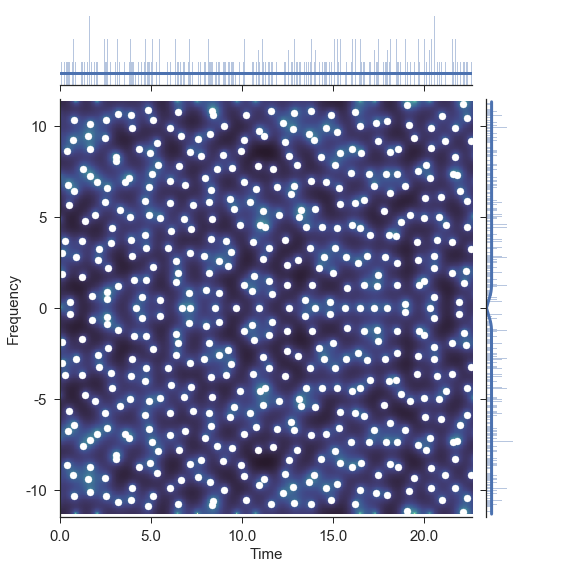

In [30]:
# display zeros
labelsize=15
sns.set(style="ticks", color_codes=True)

# plotting data
g = sns.JointGrid(pos[:, 0], pos[:, 1])
g = g.plot_joint(plt.scatter, color='w')
g.ax_joint.imshow(np.log10(plotData[0]), extent=[0, end, 0, end], origin='lower', cmap=cmocean.cm.deep, interpolation=None)

g.plot_marginals(sns.distplot, kde=False, color='b', norm_hist=True, bins=np.linspace(0, end, 2*base))


# plot marginal
g.ax_marg_x.axhline(y=1/end, xmin=0, xmax=end, linewidth=3)
g.ax_marg_y.plot(rho_th, yv+end/2, linewidth=3)

# ax lim and labels
g.ax_joint.set_xlim([0, end])
g.ax_joint.set_ylim([0, end])

ticks = np.sqrt(2*base)/2 + np.arange(-10, 11, 5)
g.ax_joint.set_yticks(ticks)
g.ax_joint.set_yticklabels(np.arange(-10, 11, 5), size=labelsize)
g.ax_joint.set_xticklabels(np.arange(0, np.sqrt(2*base)+1, 5), size=labelsize)

g.ax_joint.set_ylabel('Frequency', size=labelsize)
g.ax_joint.set_xlabel('Time', size=labelsize)
g.fig.set_figheight(8)
g.fig.set_figwidth(8)

## Zeros of the spectrogram of complex white Gaussian noise

In [37]:
base = 128
pos, plotData = zerosSpectrogram.experiments.demoSpectrogramWhiteNoise(base, mode='complex')

STFT computed


Let us vizualize this

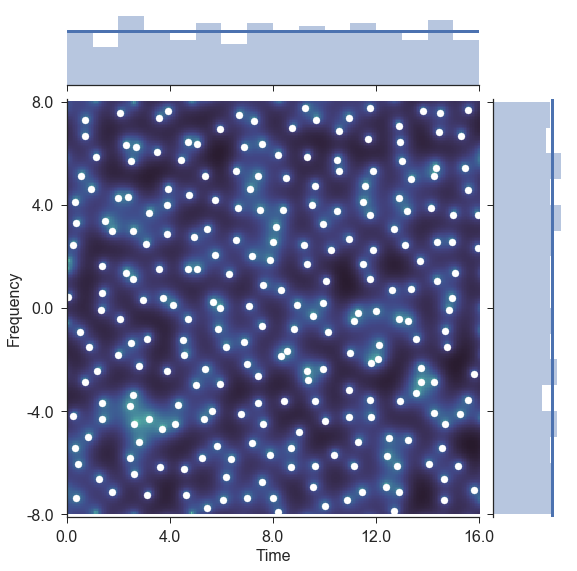

In [38]:
# display zeros
labelsize=16
sns.set(style="ticks", color_codes=True)
#sns.axes_style("white")

end = np.sqrt(2*base)

# plotting data
g = sns.JointGrid(pos[:, 0], pos[:, 1], )
g = g.plot_joint(plt.scatter, color='w', )
g.ax_joint.imshow(np.log10(plotData[0]), extent=[0, end, 0, end], origin='lower', cmap=cmocean.cm.deep, interpolation=None)

g.plot_marginals(sns.distplot, kde=False, color='b', norm_hist=True, bins=np.arange(0, np.sqrt(2*base)+1))


# theoretical values
g.ax_marg_x.axhline(y=1/end, xmin=0, xmax=end, linewidth=3)
g.ax_marg_y.axvline(x=1/end, ymin=0, ymax=end, linewidth=3)

# ax lim and labels
g.ax_joint.set_xlim([0, end])
g.ax_joint.set_ylim([0, end])

g.ax_joint.set_xticks(np.arange(0, np.sqrt(2*base)+1, 4))
g.ax_joint.set_xticklabels(np.arange(0, np.sqrt(2*base)+1, 4), size=labelsize)
g.ax_joint.set_yticks(np.arange(0, np.sqrt(2*base)+1, 4))
g.ax_joint.set_yticklabels(np.arange(-np.sqrt(2*base)/2, np.sqrt(2*base)+1, 4), size=labelsize)

g.ax_joint.set_ylabel('Frequency', size=labelsize)
g.ax_joint.set_xlabel('Time', size=labelsize)

g.fig.set_figheight(8)
g.fig.set_figwidth(8)

## Spatial statistics on the zeros of the spectrogram of complex white Gaussian noise

Now, we want to investigate the statistical properties of the point process formed by the zeros of the spectrogram of white Gaussian noise. 

For better accuracy, let first resimulate a larger set of zeros.

In [39]:
base = 1024
pos, plotData =  zerosSpectrogram.experiments.demoSpectrogramWhiteNoise(base, mode='complex')

STFT computed


Spatial statistics functions $K(r)$, $L(r)$ and the pair correlation function are computed using `spatstat` R package interfaced in python using `r2py`.

In [40]:
radius, K, L, pcf = zerosSpectrogram.spatialstats.spatialStatsFromR(pos)

Compute the theoretical values of these spatial statistics:

In [41]:
rho_gaf = zerosSpectrogram.spatialstats.pairCorrPlanarGaf(radius, np.pi)
# Compute K et L functions
Krho_gaf = zerosSpectrogram.spatialstats.Kfunction(radius, rho_gaf)
Lrho_gaf = np.sqrt(Krho_gaf/np.pi)

rho_gin = zerosSpectrogram.spatialstats.ginibreGaf(radius, np.pi)
Krho_gin = zerosSpectrogram.spatialstats.Kfunction(radius, rho_gin)
Lrho_gin = np.sqrt(Krho_gin/np.pi)

Lpois = np.zeros(len(radius))
rho_pois = np.ones(len(radius))

First, plot the pair correlation functions.

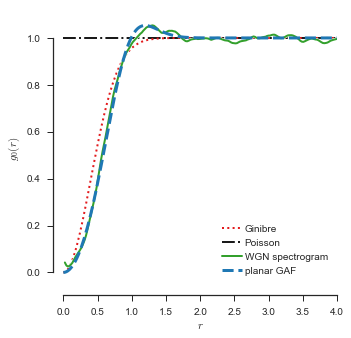

In [42]:
cmap = sns.color_palette("Paired", 6)

fig, ax = plt.subplots(figsize=(5, 5))
lw = 2
al = 1
ax.plot(radius, rho_gin, ':', linewidth=lw, color=cmap[5], label='Ginibre', alpha=al)

ax.plot(radius, rho_pois, linewidth=lw, color="k", zorder=-1, linestyle='-.', label='Poisson', alpha=al)
ax.plot(radius, pcf[0], linewidth=3, color='w')
ax.plot(radius, pcf[0], linewidth=2, color=cmap[3], label='WGN spectrogram', alpha=1.)
ax.plot(radius, rho_gaf, '--', linewidth=lw+1, color=cmap[1], label='planar GAF', alpha=al)

rMax = 4 # we cut the plot to see the details on the left better
plt.xlim([0,rMax])

# labels and lims
ax.set_ylabel(r'$g_{0}(r)$')
ax.set_xlabel(r'$r$')
plt.legend(loc=0)
sns.despine(offset=10, trim=True)

fig.subplots_adjust(left=0.19, right=.95)

Then, we plot the $r \mapsto L(r)$ statistic

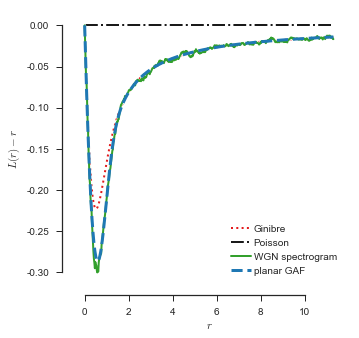

In [43]:
# plot L functions
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(radius, Lrho_gin-radius, ':', label='Ginibre', linewidth=2, color=cmap[5]) 

ax.plot(radius, Lpois, linewidth=2, color="k", zorder=-1, label='Poisson', linestyle='-.') 
ax.plot(radius, L[2]-radius, linewidth=3, color='w')      
ax.plot(radius, L[2]-radius, linewidth=2, label='WGN spectrogram', color=cmap[3])      
ax.plot(radius, Lrho_gaf-radius, '--', linewidth=lw+1, label='planar GAF', color=cmap[1])

ax.set_xlabel(r'$r$')

ax.set_ylabel(r'$L(r)-r$')

sns.despine(offset=10, trim=True)
plt.legend(loc=0)

fig.subplots_adjust(left=0.19, right=.95)